In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv('./GOOG.csv')

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d') # Converts string to datetime
df = df.set_index('Date') # Set the index of dataframe to date column
df = df.dropna()

In [203]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [204]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-26,1157.260010,1169.469971,1152.959961,1168.890015,1168.890015,1226100
2019-08-27,1180.530029,1182.400024,1161.449951,1167.839966,1167.839966,1077200
2019-08-28,1161.709961,1176.420044,1157.300049,1171.020020,1171.020020,802000
2019-08-29,1181.119995,1196.060059,1181.119995,1192.849976,1192.849976,1088400
2019-08-30,1198.500000,1198.500000,1183.802979,1188.099976,1188.099976,1129800


In [205]:
forecast_out = 90 # Number of how many days to forecast
df['Prediction'] = df['Adj Close'].shift(-forecast_out)

In [206]:
x = np.array(df.drop(['Prediction'], 1))
x = preprocessing.scale(x)

In [207]:
x_forecast = x[-forecast_out:]
x = x[:-forecast_out]

In [208]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [210]:
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

linear_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [211]:
linear_model_score = linear_model.score(x_test, y_test)
print('LinearModel score:', linear_model_score)

ridge_model_score = ridge_model.score(x_test, y_test)
print('RidgeModel score:', ridge_model_score)

lasso_model_score = lasso_model.score(x_test, y_test)
print('LassoModel score:', lasso_model_score)

LinearModel score: 0.9610382384903557
RidgeModel score: 0.9606449455223066
LassoModel score: 0.9607511169389711


In [212]:
linear_model_forecast_prediction = linear_model.predict(x_forecast)
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)

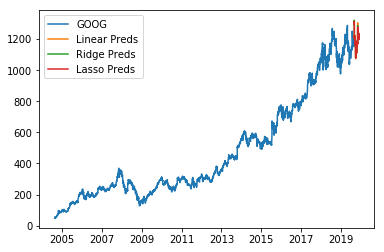

In [215]:
predicted_dates = []
recent_date = df.index.max()
for i in range(forecast_out):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

plt.plot(df.index, df['Close'], label='GOOG')
plt.plot(predicted_dates, linear_model_forecast_prediction, label='Linear Preds')
plt.plot(predicted_dates, ridge_model_forecast_prediction, label='Ridge Preds')
plt.plot(predicted_dates, lasso_model_forecast_prediction, label='Lasso Preds')
plt.legend()